# 5. APIs

In [22]:
import pandas as pd
import requests

In [7]:
requests.get('https://api.stlouisfed.org').text

'<!DOCTYPE html>\n<html lang="en">\n\n    <head>\n        <script>\n    dataLayer = typeof dataLayer === \'undefined\' ? [] : dataLayer;\n</script>\n<!-- Google Tag Manager -->\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n})(window,document,\'script\',\'dataLayer\',\'GTM-52PLNR\');</script>\n<!-- End Google Tag Manager -->\n<link href="/assets/fontawesome-pro/css/all.min.css" media="none" onload="if(media!=\'all\')media=\'all\'" rel="stylesheet" />\n<link href="https://fonts.googleapis.com/css?family=Open Sans:regular,bold,italic,bolditalic|Playfair+Display:regular,bold,italic,bolditalic&display=swap" rel="stylesheet" />        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n        <meta http-equiv="Content-Type" con

## Connecting to the FRED API

In [24]:
url = 'https://api.stlouisfed.org/fred/series/observations?series_id=GNPCA&api_key=abcdefghijklmnopqrstuvwxyz123456&file_type=json'
response = requests.get(url)

In [15]:
response.status_code

400

In [16]:
response.text

'{"error_code":400,"error_message":"Bad Request.  The value for variable api_key is not registered.  Read https:\\/\\/fred.stlouisfed.org\\/docs\\/api\\/api_key.html for more information."}'

In [17]:
response.json()

{'error_code': 400,
 'error_message': 'Bad Request.  The value for variable api_key is not registered.  Read https://fred.stlouisfed.org/docs/api/api_key.html for more information.'}

In [17]:
import api_keys
# This will make sure the file gets reloaded if you add more api keys
from importlib import reload
reload(api_keys)

fred_api_key = api_keys.fred_api_key

In [27]:
# FRED API Key Challenge
url = f'https://api.stlouisfed.org/fred/series/observations?series_id=GNPCA&api_key={fred_api_key}&file_type=json'
response = requests.get(url)
response.json()

{'realtime_start': '2023-09-26',
 'realtime_end': '2023-09-26',
 'observation_start': '1600-01-01',
 'observation_end': '9999-12-31',
 'units': 'lin',
 'output_type': 1,
 'file_type': 'json',
 'order_by': 'observation_date',
 'sort_order': 'asc',
 'count': 94,
 'offset': 0,
 'limit': 100000,
 'observations': [{'realtime_start': '2023-09-26',
   'realtime_end': '2023-09-26',
   'date': '1929-01-01',
   'value': '1120.718'},
  {'realtime_start': '2023-09-26',
   'realtime_end': '2023-09-26',
   'date': '1930-01-01',
   'value': '1025.678'},
  {'realtime_start': '2023-09-26',
   'realtime_end': '2023-09-26',
   'date': '1931-01-01',
   'value': '958.927'},
  {'realtime_start': '2023-09-26',
   'realtime_end': '2023-09-26',
   'date': '1932-01-01',
   'value': '834.769'},
  {'realtime_start': '2023-09-26',
   'realtime_end': '2023-09-26',
   'date': '1933-01-01',
   'value': '823.628'},
  {'realtime_start': '2023-09-26',
   'realtime_end': '2023-09-26',
   'date': '1934-01-01',
   'value':

In [31]:
# NOTE: Some APIs have you authenticate by passing the 
# api key into the headers argument instead

# headers = {"Authorization": f'Bearer {api_key}'}
# requests.get(url, headers=headers)

### Turning the response into a DataFrame

In [30]:
pd.DataFrame(response.json()['observations'])

,realtime_start,realtime_end,date,value
0,2023-09-26,2023-09-26,1929-01-01,1120.718
1,2023-09-26,2023-09-26,1930-01-01,1025.678
2,2023-09-26,2023-09-26,1931-01-01,958.927
3,2023-09-26,2023-09-26,1932-01-01,834.769
4,2023-09-26,2023-09-26,1933-01-01,823.628
...,...,...,...,...
89,2023-09-26,2023-09-26,2018-01-01,18874.78
90,2023-09-26,2023-09-26,2019-01-01,19286.841
91,2023-09-26,2023-09-26,2020-01-01,18685.401
92,2023-09-26,2023-09-26,2021-01-01,19759.327


### Request params

In [34]:
url = 'https://api.stlouisfed.org/fred/series/observations'
params = {'series_id': 'GNPCA',
          'api_key': fred_api_key,
          'file_type': 'json'}

response = requests.get(url, params=params)
observations = response.json()['observations']
pd.DataFrame(observations)

,realtime_start,realtime_end,date,value
0,2023-09-26,2023-09-26,1929-01-01,1120.718
1,2023-09-26,2023-09-26,1930-01-01,1025.678
2,2023-09-26,2023-09-26,1931-01-01,958.927
3,2023-09-26,2023-09-26,1932-01-01,834.769
4,2023-09-26,2023-09-26,1933-01-01,823.628
...,...,...,...,...
89,2023-09-26,2023-09-26,2018-01-01,18874.78
90,2023-09-26,2023-09-26,2019-01-01,19286.841
91,2023-09-26,2023-09-26,2020-01-01,18685.401
92,2023-09-26,2023-09-26,2021-01-01,19759.327


In [66]:
# FRED API Parameters Challenge
url = 'https://api.stlouisfed.org/fred/series/observations'
params = {'series_id': 'GDP',
          'api_key': fred_api_key,
          'file_type': 'json',
          'observation_start': '1950-01-01',
          'observation_end': '2020-01-01',
          'units': 'pch',
          'frequency': 'a'}

response = requests.get(url, params=params)
df_gdp = pd.DataFrame(response.json()['observations'])
df_gdp

,realtime_start,realtime_end,date,value
0,2023-09-26,2023-09-26,1950-01-01,10.03834
1,2023-09-26,2023-09-26,1951-01-01,15.70438
2,2023-09-26,2023-09-26,1952-01-01,5.88836
3,2023-09-26,2023-09-26,1953-01-01,5.95544
4,2023-09-26,2023-09-26,1954-01-01,0.34210
...,...,...,...,...
66,2023-09-26,2023-09-26,2016-01-01,2.68638
67,2023-09-26,2023-09-26,2017-01-01,4.18415
68,2023-09-26,2023-09-26,2018-01-01,5.42025
69,2023-09-26,2023-09-26,2019-01-01,4.12953


<AxesSubplot:title={'center':'Annual GDP % Change'}, xlabel='date'>

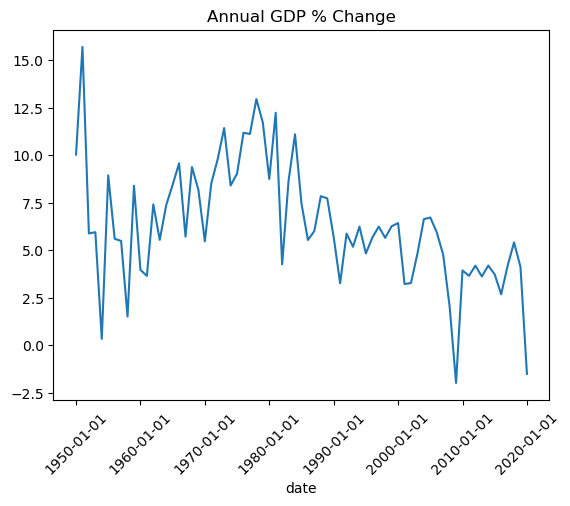

In [74]:
df_gdp.value = pd.to_numeric(df_gdp.value)
df_gdp.plot(x='date', y='value', rot=45, title='Annual GDP Change % Change', legend=False)

### API Endpoints

In [78]:
url = 'https://api.stlouisfed.org/fred/series/search'
params = {'search_text': 'Oil Prices',
          'api_key': fred_api_key,
          'file_type': 'json'}

response = requests.get(url, params=params)
pd.DataFrame(response.json()['seriess'])

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,group_popularity,notes
0,DCOILWTICO,2023-09-26,2023-09-26,Crude Oil Prices: West Texas Intermediate (WTI...,1986-01-02,2023-09-18,Daily,D,Dollars per Barrel,$ per Barrel,Not Seasonally Adjusted,NSA,2023-09-20 12:16:02-05,79,80,"Definitions, Sources and Explanatory Notes (ht..."
1,MCOILWTICO,2023-09-26,2023-09-26,Crude Oil Prices: West Texas Intermediate (WTI...,1986-01-01,2023-08-01,Monthly,M,Dollars per Barrel,$ per Barrel,Not Seasonally Adjusted,NSA,2023-09-07 13:07:02-05,55,80,"Definitions, Sources and Explanatory Notes:\nh..."
2,WCOILWTICO,2023-09-26,2023-09-26,Crude Oil Prices: West Texas Intermediate (WTI...,1986-01-03,2023-09-15,"Weekly, Ending Friday",W,Dollars per Barrel,$ per Barrel,Not Seasonally Adjusted,NSA,2023-09-20 12:16:08-05,31,80,"Definitions, Sources and Explanatory Notes: ht..."
3,ACOILWTICO,2023-09-26,2023-09-26,Crude Oil Prices: West Texas Intermediate (WTI...,1986-01-01,2022-01-01,Annual,A,Dollars per Barrel,$ per Barrel,Not Seasonally Adjusted,NSA,2023-01-05 12:16:03-06,21,80,"Definitions, Sources and Explanatory Notes:\nh..."
4,DCOILBRENTEU,2023-09-26,2023-09-26,Crude Oil Prices: Brent - Europe,1987-05-20,2023-09-18,Daily,D,Dollars per Barrel,$ per Barrel,Not Seasonally Adjusted,NSA,2023-09-20 12:16:02-05,71,73,"Definitions, Sources and Explanatory Notes (ht..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,00XESECHM086NEST,2023-09-26,2023-09-26,Harmonized Index of Consumer Prices: Overall I...,2004-12-01,2023-08-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2023-09-19 07:07:47-05,1,1,The Harmonized Index of Consumer Prices catego...
996,GOODS0MTM086NEST,2023-09-26,2023-09-26,Harmonized Index of Consumer Prices: Goods (Ov...,1996-01-01,2023-08-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2023-09-19 07:09:19-05,1,1,The Harmonized Index of Consumer Prices catego...
997,00XESENLM086NEST,2023-09-26,2023-09-26,Harmonized Index of Consumer Prices: Overall I...,1999-12-01,2023-08-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2023-09-19 07:07:44-05,1,1,The Harmonized Index of Consumer Prices catego...
998,GOODS0DKM086NEST,2023-09-26,2023-09-26,Harmonized Index of Consumer Prices: Goods (Ov...,1999-12-01,2023-08-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2023-09-19 07:09:21-05,1,1,The Harmonized Index of Consumer Prices catego...


## fredapi Python Library

In [79]:
pip install fredapi

Note: you may need to restart the kernel to use updated packages.


In [80]:
from fredapi import Fred

In [81]:
fred = Fred(api_key=fred_api_key) 

In [86]:
fred.get_series('SP500')

2013-09-26    1698.67
2013-09-27    1691.75
2013-09-30    1681.55
2013-10-01    1695.00
2013-10-02    1693.87
               ...   
2023-09-19    4443.95
2023-09-20    4402.20
2023-09-21    4330.00
2023-09-22    4320.06
2023-09-25    4337.44
Length: 2608, dtype: float64

In [83]:
fred.search('Oil Prices')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
DCOILWTICO,DCOILWTICO,2023-09-26,2023-09-26,Crude Oil Prices: West Texas Intermediate (WTI...,1986-01-02,2023-09-18,Daily,D,Dollars per Barrel,$ per Barrel,Not Seasonally Adjusted,NSA,2023-09-20 12:16:02-05:00,79,"Definitions, Sources and Explanatory Notes (ht..."
MCOILWTICO,MCOILWTICO,2023-09-26,2023-09-26,Crude Oil Prices: West Texas Intermediate (WTI...,1986-01-01,2023-08-01,Monthly,M,Dollars per Barrel,$ per Barrel,Not Seasonally Adjusted,NSA,2023-09-07 13:07:02-05:00,55,"Definitions, Sources and Explanatory Notes: ht..."
WCOILWTICO,WCOILWTICO,2023-09-26,2023-09-26,Crude Oil Prices: West Texas Intermediate (WTI...,1986-01-03,2023-09-15,"Weekly, Ending Friday",W,Dollars per Barrel,$ per Barrel,Not Seasonally Adjusted,NSA,2023-09-20 12:16:08-05:00,31,"Definitions, Sources and Explanatory Notes: ht..."
ACOILWTICO,ACOILWTICO,2023-09-26,2023-09-26,Crude Oil Prices: West Texas Intermediate (WTI...,1986-01-01,2022-01-01,Annual,A,Dollars per Barrel,$ per Barrel,Not Seasonally Adjusted,NSA,2023-01-05 12:16:03-06:00,21,"Definitions, Sources and Explanatory Notes: ht..."
DCOILBRENTEU,DCOILBRENTEU,2023-09-26,2023-09-26,Crude Oil Prices: Brent - Europe,1987-05-20,2023-09-18,Daily,D,Dollars per Barrel,$ per Barrel,Not Seasonally Adjusted,NSA,2023-09-20 12:16:02-05:00,71,"Definitions, Sources and Explanatory Notes (ht..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00XESECHM086NEST,00XESECHM086NEST,2023-09-26,2023-09-26,Harmonized Index of Consumer Prices: Overall I...,2004-12-01,2023-08-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2023-09-19 07:07:47-05:00,1,The Harmonized Index of Consumer Prices catego...
GOODS0MTM086NEST,GOODS0MTM086NEST,2023-09-26,2023-09-26,Harmonized Index of Consumer Prices: Goods (Ov...,1996-01-01,2023-08-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2023-09-19 07:09:19-05:00,1,The Harmonized Index of Consumer Prices catego...
00XESENLM086NEST,00XESENLM086NEST,2023-09-26,2023-09-26,Harmonized Index of Consumer Prices: Overall I...,1999-12-01,2023-08-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2023-09-19 07:07:44-05:00,1,The Harmonized Index of Consumer Prices catego...


In [84]:
fred.get_series('DCOILWTICO')

1986-01-02    25.56
1986-01-03    26.00
1986-01-06    26.53
1986-01-07    25.85
1986-01-08    25.87
              ...  
2023-09-12    88.87
2023-09-13    88.59
2023-09-14    90.13
2023-09-15    90.83
2023-09-18    91.47
Length: 9838, dtype: float64

## Regression

In [109]:
seriess = ['GDP', 'T10Y2Y', 'DCOILWTICO', 'SP500']
df_fred = pd.DataFrame(index=pd.date_range(start='2000-01-01', end='2023-01-01'))

for series in seriess:
    df_fred = pd.merge(df_fred, fred.get_series(series).rename(series), left_index=True, right_index=True, how='left')

In [110]:
df_fred

,GDP,CPIAUCSL,DCOILWTICO,SP500
2000-01-01,10002.179,169.300,NaN,NaN
2000-01-02,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,25.56,NaN
2000-01-05,NaN,NaN,24.65,NaN
...,...,...,...,...
2022-12-28,NaN,NaN,78.89,3783.22
2022-12-29,NaN,NaN,78.43,3849.28
2022-12-30,NaN,NaN,80.16,3839.50
2022-12-31,NaN,NaN,NaN,NaN


# Alpha Vantage API

In [111]:
pip install alpha_vantage

Note: you may need to restart the kernel to use updated packages.


In [112]:
from alpha_vantage.timeseries import TimeSeries

In [128]:
import api_keys
# This will make sure the file gets reloaded if you add more api keys
from importlib import reload
reload(api_keys)

alpha_vantage_api_key = api_keys.alpha_vantage_api_key

In [129]:
ts = TimeSeries(key=alpha_vantage_api_key, output_format='pandas')

In [125]:
df_tsla, meta_data = ts.get_daily('TSLA', outputsize='full')

In [126]:
df_tsla

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2023-09-25,243.38,247.1000,238.3100,246.99,104636557.0
2023-09-22,257.40,257.7888,244.4800,244.88,127524083.0
2023-09-21,257.85,260.8600,254.2100,255.70,119951516.0
2023-09-20,267.04,273.9300,262.4606,262.59,122514643.0
2023-09-19,264.35,267.8500,261.2000,266.50,103704040.0
...,...,...,...,...,...
2010-07-06,20.00,20.0000,15.8300,16.11,6866900.0
2010-07-02,23.00,23.1000,18.7100,19.20,5139800.0
2010-07-01,25.00,25.9200,20.2700,21.96,8218800.0


## Calculating Beta

In [130]:
df_sp500 = fred.get_series('SP500')

In [135]:
df_combined = pd.merge(df_tsla['4. close'].rename('TSLA'), 
                       df_sp500.rename('SP500'), 
                       left_index=True, 
                       right_index=True)

In [142]:
df_combined = df_combined.pct_change()[1:]

In [143]:
df_combined

,TSLA,SP500
2023-09-22,-0.008543,-0.004007
2023-09-21,0.044185,0.002301
2023-09-20,0.026946,0.016674
2023-09-19,0.014890,0.009484
2023-09-18,-0.004578,0.002156
...,...,...
2013-10-02,0.044083,0.009061
2013-10-01,0.066593,0.000667
2013-09-30,0.001917,-0.007935
2013-09-27,-0.012773,0.006066


In [147]:
import seaborn as sns

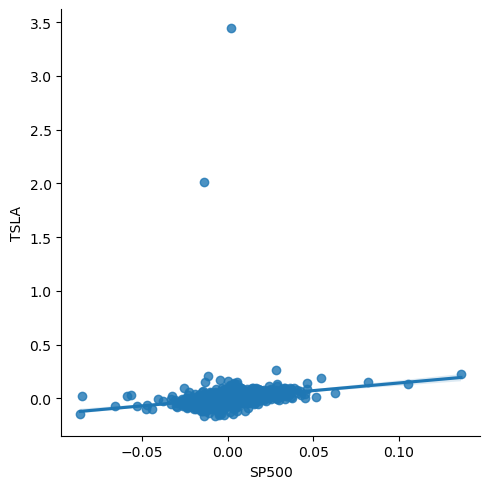

In [148]:
sns.lmplot(data=df_combined, x='SP500', y='TSLA')

In [144]:
import statsmodels.api as sm

In [145]:
x = df_combined.SP500
x = sm.add_constant(x)
y = df_combined.TSLA
model = sm.OLS(y, x)
results = model.fit()

In [146]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   TSLA   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     87.61
Date:                Tue, 26 Sep 2023   Prob (F-statistic):           1.71e-20
Time:                        13:40:29   Log-Likelihood:                 2615.1
No. Observations:                2515   AIC:                            -5226.
Df Residuals:                    2513   BIC:                            -5215.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.002      1.228      0.220      -0.001       0.005
SP500          1.4204      0.152      9.360      0.000       1.123       1.718
==============================================================================
Omnibus:                     6699.484   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        141011811.614
Skew:                          31.085   Prob(JB):                         0.00
Kurtosis:                    1161.350   Cond. No.                         88.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [149]:
results.params

const    0.002095
SP500    1.420400
dtype: float64